
# **動機與背景:**
在大AI大時代裡不管是不是專業人士都必須要懂AI，挑選此專題即是將AI與多數人的副業股市做結合。在理解AI的同時也能感受AI的好處

# **產業痛點:**
目前大家都是透過零星的資訊自行判斷，沒辦法綜觀且客觀的去評估個股狀況
現有解決方案: 商業新聞、技術指標、財報等等

# **目的:**
目的是透過深度學習，透過歷史股價、技術指標、通貨膨脹率、等作為輸入，預測個股的收盤價格

# **模型:**
LTMS

# 資料來源:
yfinance,ta,fredapi

---


參考資料:
[獲取RSI](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html)、
[Stock Market Analysis 📈 + Prediction using LSTM](https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm)、[查詢美國歷史總體經濟數據](https://havocfuture.tw/blog/python-economy-fred)、[Fred CPI](https://fred.stlouisfed.org/series/CPIAUCSL)


# 資料收集
資料獲取，透過yfinance,ta,fredapi資料庫抓取股市資料



In [ ]:
!pip install ta
!pip install fredapi

In [ ]:
import yfinance as yf
import ta
from fredapi import Fred

# 蘋果的股市數據
apple_stock = yf.download('AAPL', start='2015-01-01', end='2024-08-01')
print("\nApple Stock\n")
print(apple_stock.tail())

# S&P 500指數數據
sp500 = yf.download('^GSPC', start='2015-01-01', end='2024-08-01')
print("\nsp500\n")
print(sp500.tail())

# 只需要S&P 500收盤價
sp500 = sp500['Close']
apple_stock['SP500'] = sp500

# 計算14天的RSI
apple_stock['RSI'] = ta.momentum.RSIIndicator(apple_stock['Close'], window=14).rsi()

# 使用API獲取通貨膨脹率數據
fred = Fred(api_key='1a3a709193de67453cb8d93a68af1c13')
inflation_rate = fred.get_series('CPIAUCSL', start='2015-01-01', end='2024-08-01')
print("\nCPI\n")
print(inflation_rate.tail())

# 通貨膨脹率數據加到蘋果股票數據
apple_stock['CPI'] = inflation_rate


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Apple Stock

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   
2024-07-31  221.440002  223.820007  220.630005  222.080002  221.823242   

              Volume  
Date                  
2024-07-25  51391200  
2024-07-26  41601300  
2024-07-29  36311800  
2024-07-30  41643800  
2024-07-31  50036300  

sp500

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-07-25  5428.700195  5491.589844  5390.950195  5399.220215  5399.220215   
2024-07-26  5433.669922  5488.319824  5430.700195  5459.10009

資料檢查

In [ ]:
#資料檢查
print(apple_stock.info)
print(apple_stock.dtypes)
print(apple_stock.isnull().sum())

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02   27.847500   27.860001   26.837500   27.332500   24.373955   
2015-01-05   27.072500   27.162500   26.352501   26.562500   23.687305   
2015-01-06   26.635000   26.857500   26.157499   26.565001   23.689535   
2015-01-07   26.799999   27.049999   26.674999   26.937500   24.021713   
2015-01-08   27.307501   28.037500   27.174999   27.972500   24.944685   
...                ...         ...         ...         ...         ...   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   
2024-07-31  221.440002  223.820007  220.630005  222.080002  221.823242   

     

In [ ]:
#CPI數據未能有每個月的1號有而且只到6/1
inflation_rate = inflation_rate.reindex(apple_stock.index)

# 每個月1號的CPI值填寫到其他日
cpi_filled = inflation_rate.ffill()
print(cpi_filled)

#通貨膨脹率數據加到蘋果股票數據
apple_stock['CPI'] = cpi_filled

#CPI從2015-04-01才開始有值，將apple_stock值從2015-04-01開始計算
apple_stock = apple_stock[apple_stock.index >= '2015-04-01']
print(apple_stock.head(50))

Date
2015-01-02        NaN
2015-01-05        NaN
2015-01-06        NaN
2015-01-07        NaN
2015-01-08        NaN
               ...   
2024-07-25    313.534
2024-07-26    313.534
2024-07-29    313.534
2024-07-30    313.534
2024-07-31    313.534
Length: 2410, dtype: float64
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2015-04-01  31.205000  31.280001  30.775000  31.062500  27.809536  162485600   
2015-04-02  31.257500  31.389999  31.047501  31.330000  28.049017  128880400   
2015-04-06  31.117500  31.877501  31.082500  31.837500  28.503376  148776000   
2015-04-07  31.910000  32.029999  31.495001  31.502501  28.203457  140049200   
2015-04-08  31.462500  31.600000  31.242500  31.400000  28.111692  149316800   
2015-04-09  31.462500  31.645000  31.165001  31.639999  28.326557  129936000   
2015-04-10  31.487499  31.802500  31.315001  31.775000  28.447416  160752000   
2015

In [ ]:
#資料檢查
print(apple_stock.dtypes)
print(apple_stock.isnull().sum())

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
SP500        float64
RSI          float64
CPI          float64
dtype: object
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
SP500        0
RSI          0
CPI          0
dtype: int64


In [ ]:
# 獲取蘋果公司的財報數據
import pandas as pd

# 讀取CSV文件
df = pd.read_csv('Apple 2015-2024 revenue.csv')

# 查看數據結構
print(df.head())

# revenue去掉「B」並轉換營收數字為數值
df['revenue'] = df['revenue'].replace(['--', 'B'], [None, ''], regex=True).astype(float) * 1e9
# EPS去掉「--」並轉換營收數字為數值
df['EPS'] = df['EPS'].replace('--', None, regex=True).astype(float)

# 轉換時間格式
df['Announce Date'] = pd.to_datetime(df['Announce Date'], format='%Y年%m月%d日')
df.set_index('Announce Date', inplace=True)
print(df.head())

#把季營收給公告後的三個月
def expand_to_daily(df):
    daily_dfs = []  # 用於儲存每日數據的列表

    for date, revenue in df['revenue'].items():

      # print("date - pd.DateOffset(days=5)")
      # print(date - pd.DateOffset(days=5))
      # print("---")
      if 1 <= date.day <= 5:
        start_date = date.replace(day=1)
        # print(start_date)
        end_date = (start_date + pd.DateOffset(months=3)) - pd.DateOffset(days=1)
        # print(end_date)
      else:
        start_date = (date + pd.DateOffset(months=1)).replace(day=1)
        # print(start_date)
        end_date = (start_date + pd.DateOffset(months=3)) - pd.DateOffset(days=1)
        # print(end_date)

      # 生成公告後三個月內的所有日期
      daily_range = pd.date_range(start_date, end_date, freq='D')
      daily_data = pd.DataFrame({
          'Date': daily_range,
          'Revenue': revenue
      })
      daily_data.set_index('Date', inplace=True)
      daily_dfs.append(daily_data)

    # 合併所有每日數據
    daily_df = pd.concat(daily_dfs)
    return daily_df

daily_revenue = expand_to_daily(df)

daily_revenue = daily_revenue[(daily_revenue.index >= '2015-04-01') & (daily_revenue.index <= '2024-08-01')]

daily_revenue = daily_revenue.reindex(apple_stock.index)
# print(daily_revenue.head(50))
print("daily_revenue.isnull().sum()")
print(daily_revenue.isnull().sum())

#季營收數據加到蘋果股票數據
apple_stock['Revenue'] = daily_revenue
print(apple_stock.head(50))

  Announce Date   EPS  revenue
0   2024年10月24日    --       --
1     2024年8月1日   1.4    85.8B
2     2024年5月2日  1.53    90.8B
3     2024年2月1日  2.18  119.58B
4    2023年11月2日  1.46    89.5B
                EPS       revenue
Announce Date                    
2024-10-24      NaN           NaN
2024-08-01     1.40  8.580000e+10
2024-05-02     1.53  9.080000e+10
2024-02-01     2.18  1.195800e+11
2023-11-02     1.46  8.950000e+10
daily_revenue.isnull().sum()
Revenue    0
dtype: int64
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2015-04-01  31.205000  31.280001  30.775000  31.062500  27.809536  162485600   
2015-04-02  31.257500  31.389999  31.047501  31.330000  28.049017  128880400   
2015-04-06  31.117500  31.877501  31.082500  31.837500  28.503376  148776000   
2015-04-07  31.910000  32.029999  31.495001  31.502501  28.203457  140049200   
2015-04-08  31.462500  31.600000  31.2425

# 數據預處理

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#將 "Adj Close" 移到最後一欄
columns = list(apple_stock.columns)
# 移除 "Adj Close" 並將其添加到最後
columns.remove('Adj Close')
columns.append('Adj Close')

# 重新排列 DataFrame 的列
apple_stock = apple_stock.reindex(columns=columns)
print(apple_stock.head())

sc = MinMaxScaler(feature_range=(0, 1))
sc_data = sc.fit_transform(apple_stock)
print(sc_data)

# 設置look_back的參數，過去60天來預測未來
look_back = 60

# 創建訓練集(3維)
def create_dataset(dataset, look_back):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), :-1])
        Y.append(dataset[i + look_back, -1])
    return np.array(X), np.array(Y)

X, Y = create_dataset(sc_data, look_back)

# 分割訓練和測試集
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

               Open       High        Low      Close     Volume        SP500  \
Date                                                                           
2015-04-01  31.2050  31.280001  30.775000  31.062500  162485600  2059.689941   
2015-04-02  31.2575  31.389999  31.047501  31.330000  128880400  2066.959961   
2015-04-06  31.1175  31.877501  31.082500  31.837500  148776000  2080.620117   
2015-04-07  31.9100  32.029999  31.495001  31.502501  140049200  2076.330078   
2015-04-08  31.4625  31.600000  31.242500  31.400000  149316800  2081.899902   

                  RSI      CPI       Revenue  Adj Close  
Date                                                     
2015-04-01  47.866338  236.222  7.460000e+10  27.809536  
2015-04-02  50.599901  236.222  7.460000e+10  28.049017  
2015-04-06  55.380003  236.222  7.460000e+10  28.503376  
2015-04-07  51.815787  236.222  7.460000e+10  28.203457  
2015-04-08  50.739748  236.222  7.460000e+10  28.111692  
[[0.04068137 0.03902013 0.0398984

# 建立和訓練LSTM模型

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# 建立LSTM模型
model = Sequential()
# X_train.shape 是一個表示 X_train 數組形狀的元組 (樣本數量, 時間步數, 特徵數)。
# X_train.shape[0] 代表訓練集中樣本的數量（即序列的數量）這由 look_back 決定。
# X_train.shape[1] 代表每個樣本中的時間步數。
# X_train.shape[2] 代表每個時間步的特徵數。
#return_sequences = true 表示將每個時間步的輸出都傳遞給下一層 LSTM。這樣，下一層 LSTM 可以接收整個序列，而不只是最後一個時間步的輸出
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
#在最後一層 LSTM 中，通常只關心最後一個時間步的輸出，因為這代表了整個序列的總結
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
model.fit(X_train, Y_train, batch_size=32, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.0289
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0028
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0018
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0017
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0012
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0011
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0010
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0011
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 9.2546e-04
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0010
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 8.6303e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 7.9040e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 7.4093e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 7.4739e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


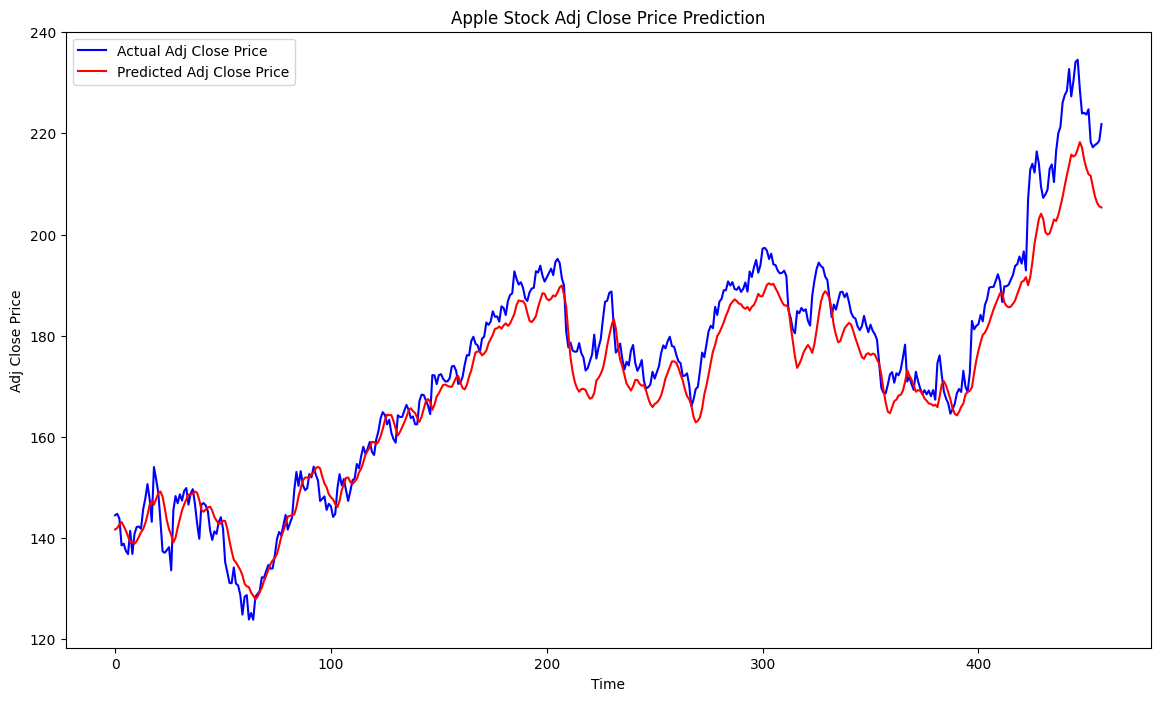

In [ ]:
# 獲取單獨的 Adj Close 列來進行標準化
sc_adj_close = MinMaxScaler(feature_range=(0, 1))
adj_close_scaled = sc_adj_close.fit_transform(apple_stock[['Adj Close']])

# 使用模型進行預測
predictions = model.predict(X_test)

# 反標準化預測結果
predicted_adj_close = sc_adj_close.inverse_transform(predictions)

# 反標準化實際的 Adj Close 值
actual_adj_close = sc_adj_close.inverse_transform(Y_test.reshape(-1, 1))


# 繪製實際與預測的 Adj Close 價格
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(actual_adj_close, color='blue', label='Actual Adj Close Price')
plt.plot(predicted_adj_close, color='red', label='Predicted Adj Close Price')
plt.title('Apple Stock Adj Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [ ]:
#使用不同的標準化器來反標準化，反標準化後的值是是否會有異？
#以下使將X,Y特徵和預測結果分開坐標準化完後再合併去執行深度學習，
#最終再透過Y自己的標準器反標準化回原來的數值，看起來結果一樣

# 使用上面已經對'Adj Close'進行標準化的標準器來使用
#sc_adj_close = MinMaxScaler(feature_range=(0, 1))
#adj_close_scaled = sc_adj_close.fit_transform(apple_stock[['Adj Close']])

# # 重新標準化整個數據（不包含 'Adj Close'）
# features_data = apple_stock.drop(columns=['Adj Close'])
# sc_features = MinMaxScaler(feature_range=(0, 1))
# features_scaled = sc_features.fit_transform(features_data)

# # 拼接標準化後的特徵和 'Adj Close'
# sc_data = np.hstack((features_scaled, adj_close_scaled))
# # print("sc_data")
# # print(sc_data)

# X2, Y2 = create_dataset(sc_data, look_back)
# train_size = int(len(X2) * 0.8)
# Xtrain2, Xtest2 = X2[:train_size], X2[train_size:]
# Ytrain2, Ytest2 = Y2[:train_size], Y2[train_size:]
# # print('Xtrain2, Xtest2')
# # print(Xtrain2, Xtest2)
# # print('Ytrain2, Ytest2')
# #print(Ytrain2, Ytest2)

# model2 = Sequential()
# #return_sequences = true 表示將每個時間步的輸出都傳遞給下一層 LSTM。這樣，下一層 LSTM 可以接收整個序列，而不只是最後一個時間步的輸出
# model2.add(LSTM(units=50, return_sequences=True, input_shape= (Xtrain2.shape[1], Xtrain2.shape[2])))
# model2.add(Dropout(0.2))
# #在最後一層 LSTM 中，通常只關心最後一個時間步的輸出，因為這代表了整個序列的總結
# model2.add(LSTM(units=50, return_sequences=False))
# model2.add(Dropout(0.2))
# model2.add(Dense(units=25))
# model2.add(Dense(units=1))

# model2.compile(optimizer='adam', loss='mean_squared_error')
# model2.fit(Xtrain2, Ytrain2, batch_size=32, epochs=50)

# predictions2 = model2.predict(Xtest2)
# #print('predictions2 before reshape')
# #print(predictions2)
# predictions2 = predictions.reshape(-1, 1)
# #print('predictions2 reshape')
# #print(predictions2)

# # 反標準化預測值
# # 需要先將 predictions 轉換為標準化後的數據格式
# # 由Xtest最後一列＋predictions
# # X_test[:, -1, :] 提取的是每個樣本的最後一個時間步的特徵。X_test 的形狀是 (樣本數量, 時間步數, 特徵數)
# X_test_features = Xtest2[:, -1, :]
# #print('Xtest最後一列')
# #print(X_test_features)
# predicted_full_data = np.hstack((X_test_features, predictions))
# #print('predicted_full_data')
# #print(predicted_full_data)
# predicted_adj_close = sc_adj_close.inverse_transform(predicted_full_data[:, -1].reshape(-1, 1))
# #print('predicted_adj_close inverse')
# #print(predicted_adj_close)

# # 反標準化實際的 'Adj Close'
# actual_full_data = np.hstack((X_test_features, Y_test.reshape(-1, 1)))
# #print('actual_full_data')
# #print(actual_full_data)
# actual_adj_close = sc_adj_close.inverse_transform(actual_full_data[:,-1].reshape(-1, 1))

# plt.figure(figsize=(14, 8))
# plt.plot(actual_adj_close, color='blue', label='Actual Adj Close Price')
# plt.plot(predicted_adj_close, color='red', label='Predicted Adj Close Price')
# plt.title('Apple Stock Adj Close Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Adj Close Price')
# plt.legend()
# plt.show()

NameError: name 'adj_close_scaled' is not defined